In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [4]:
data = pd.read_csv("Airpassengers.csv")
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [5]:
dateparse = lambda dates : pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
ts = data["#Passengers"] 


In [8]:
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

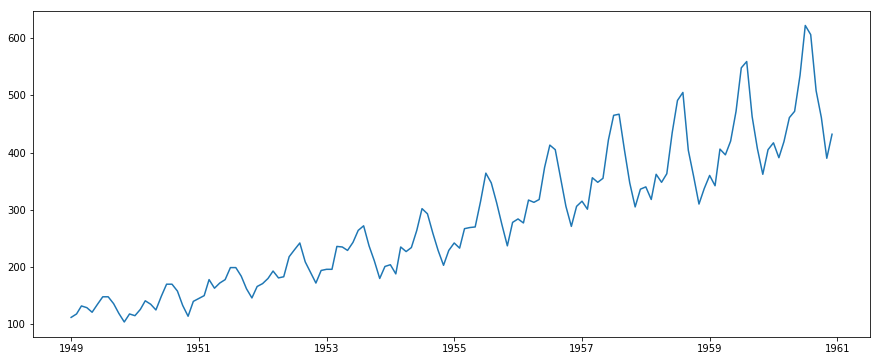

In [10]:
plt.plot(ts)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_Stationarity(TimeSeries):
    
        #Determing rolling statistics:
        rolmean = pd.rolling_mean(TimeSeries, window=12)
        rolstd = pd.rolling_std(TimeSeries, window=12)
        
        #Plot rolling statistics:
        orig = plt.plot(TimeSeries,color='blue',label='Original')
        mean = plt.plot(rolmean,color='red', label='Rolling mean')
        std = plt.plot(rolstd,color='black', label='Rolling std')
        plt.legend(loc='best')
        plt.title('Rolling mean & std deviation')
        plt.show(block=False)
        
        #perform dicky fuller test
        print("result dicky fuller test")
        dftest=adfuller(TimeSeries,autolag='AIC')
        dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of obs used'])
        for key,value in dftest[4].items():
            dfoutput['Critical val (%s)'%key] = value
        print(dfoutput)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


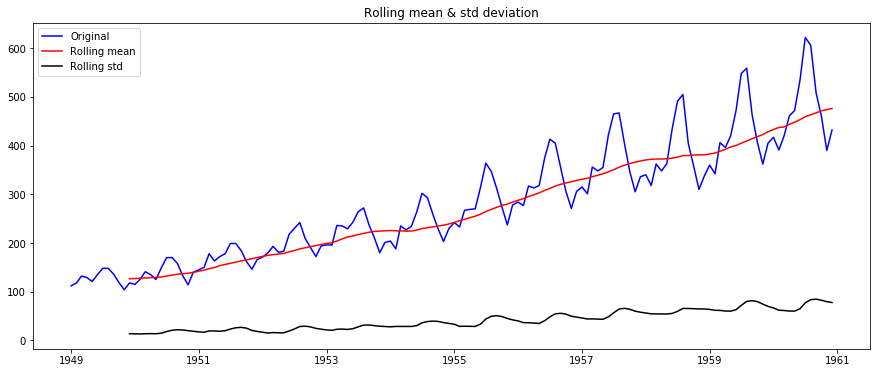

result dicky fuller test
Test Statistic          0.815369
p-value                 0.991880
#Lags Used             13.000000
Number of obs used    130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [12]:
x = test_Stationarity(ts)


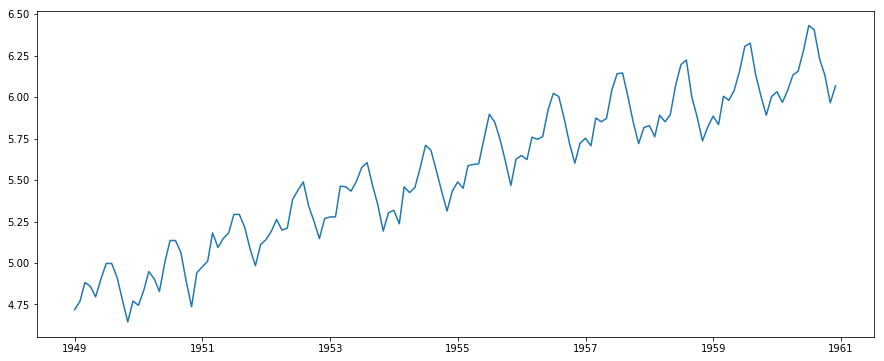

In [13]:
ts_log = np.log(ts)
plt.plot(ts_log)

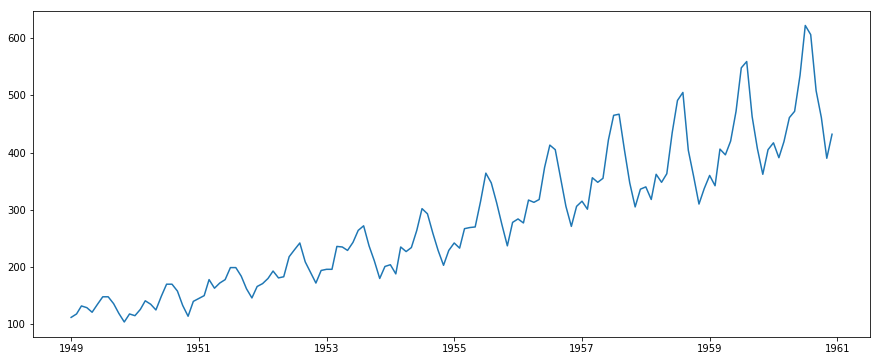

In [14]:
plt.plot(ts)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


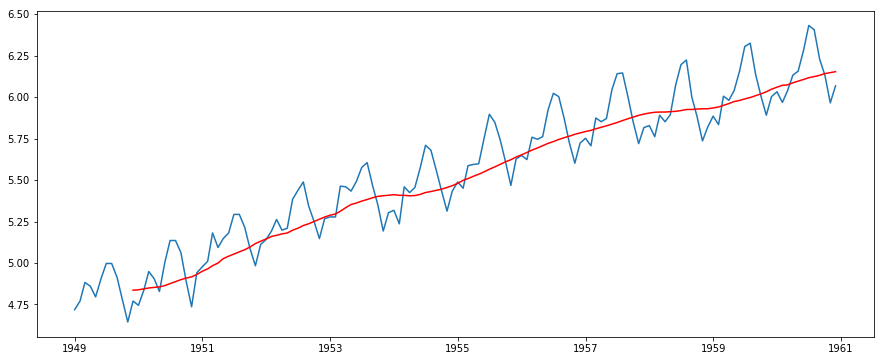

In [15]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


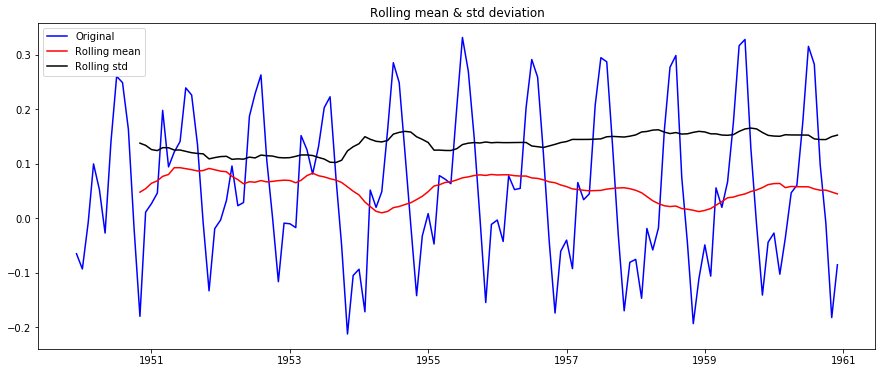

result dicky fuller test
Test Statistic         -3.162908
p-value                 0.022235
#Lags Used             13.000000
Number of obs used    119.000000
Critical val (1%)      -3.486535
Critical val (5%)      -2.886151
Critical val (10%)     -2.579896
dtype: float64


In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_Stationarity(ts_log_moving_avg_diff)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


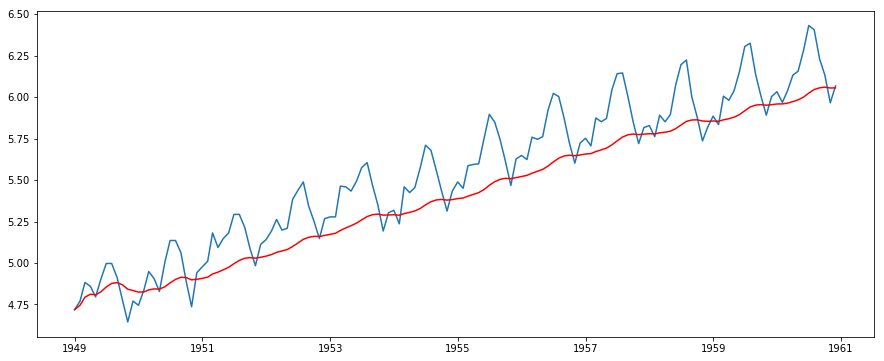

In [18]:
expweight_avg = pd.ewma(ts_log,halflife=12)
plt.plot(ts_log)
plt.plot(expweight_avg,color='red')

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


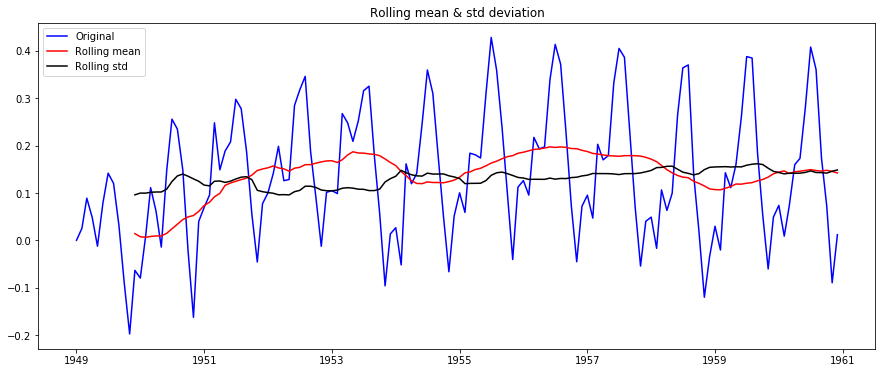

result dicky fuller test
Test Statistic         -3.601262
p-value                 0.005737
#Lags Used             13.000000
Number of obs used    130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [19]:
ts_log_ewma_diff = ts_log - expweight_avg
test_Stationarity(ts_log_ewma_diff)

In [20]:
expweight_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
1949-06-01    4.826807
1949-07-01    4.855564
1949-08-01    4.877049
1949-09-01    4.881978
1949-10-01    4.868821
1949-11-01    4.842036
1949-12-01    4.834027
1950-01-01    4.824557
1950-02-01    4.825744
1950-03-01    4.837657
1950-04-01    4.843949
1950-05-01    4.842546
1950-06-01    4.856559
1950-07-01    4.880081
1950-08-01    4.901033
1950-09-01    4.913937
1950-10-01    4.912097
1950-11-01    4.898667
1950-12-01    4.901883
1951-01-01    4.907382
1951-02-01    4.914838
1951-03-01    4.933808
1951-04-01    4.945007
1951-05-01    4.958991
1951-06-01    4.974181
                ...   
1958-07-01    5.832405
1958-08-01    5.854442
1958-09-01    5.862700
1958-10-01    5.863859
1958-11-01    5.856708
1958-12-01    5.854650
1959-01-01    5.856417
1959-02-01    5.855203
1959-03-01    5.863694
1959-04-01    5.870306
1959-05-01    5.879851
1959-06-01    5.895416
1959-

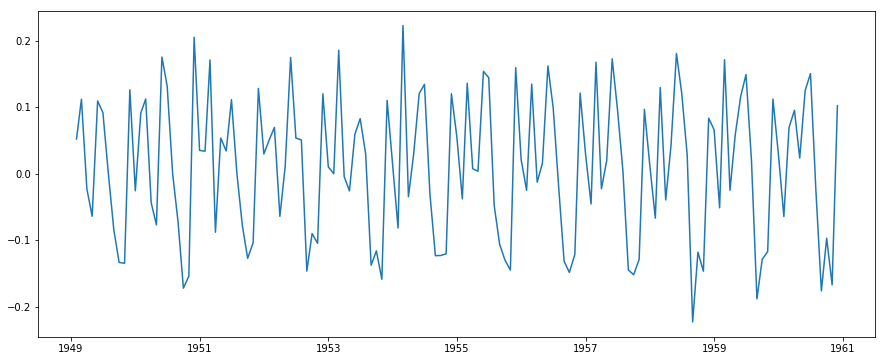

In [21]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


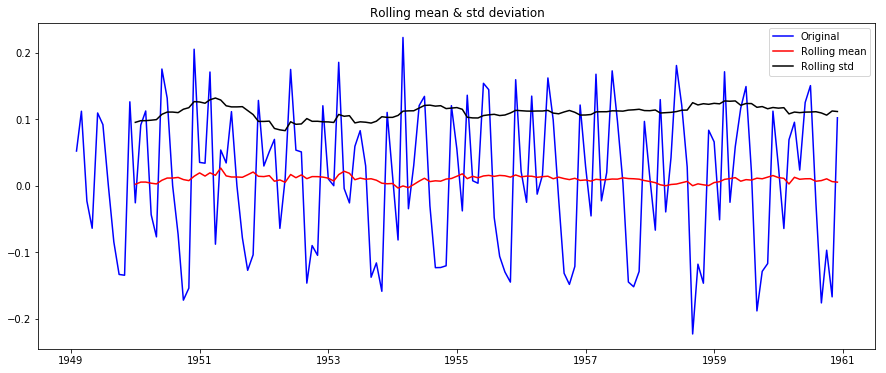

result dicky fuller test
Test Statistic         -2.717131
p-value                 0.071121
#Lags Used             14.000000
Number of obs used    128.000000
Critical val (1%)      -3.482501
Critical val (5%)      -2.884398
Critical val (10%)     -2.578960
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_Stationarity(ts_log_diff)

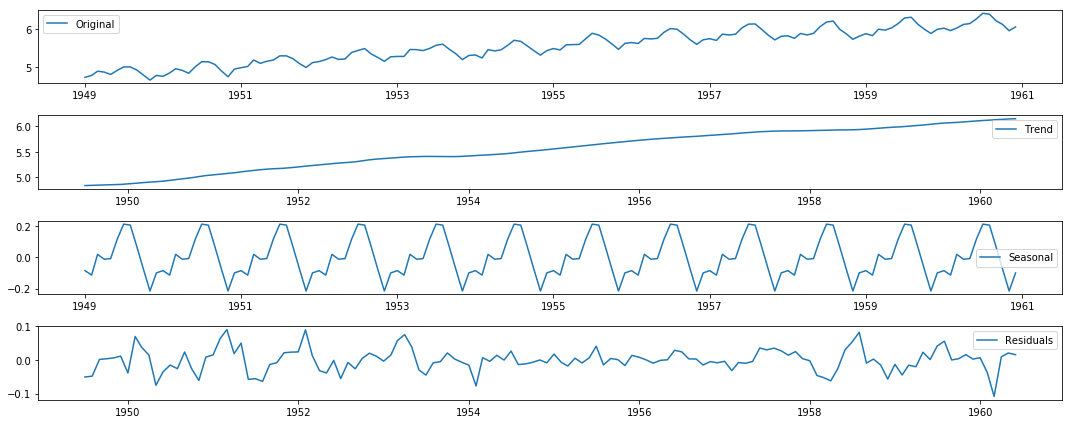

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


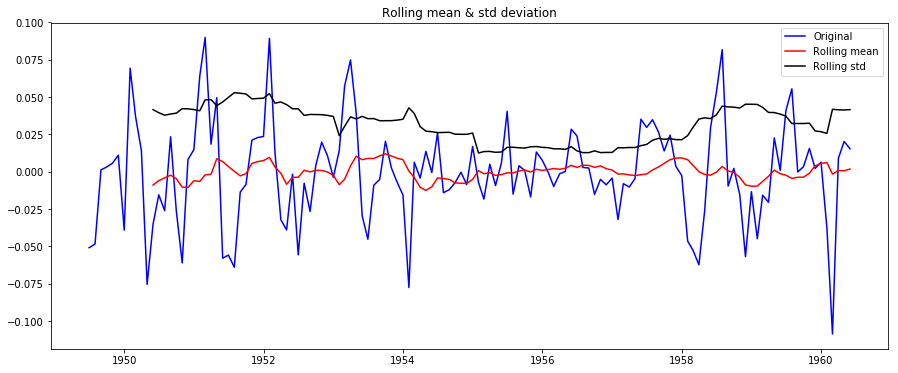

result dicky fuller test
Test Statistic       -6.332387e+00
p-value               2.885059e-08
#Lags Used            9.000000e+00
Number of obs used    1.220000e+02
Critical val (1%)    -3.485122e+00
Critical val (5%)    -2.885538e+00
Critical val (10%)   -2.579569e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_Stationarity(ts_log_decompose)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf


In [26]:
lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20,method='ols')


Text(0.5,1,'Auto correlation funciton')

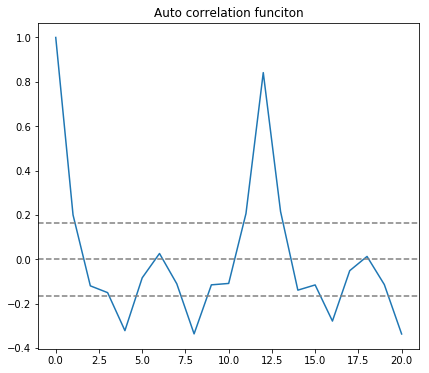

In [27]:
#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title("Auto correlation funciton")

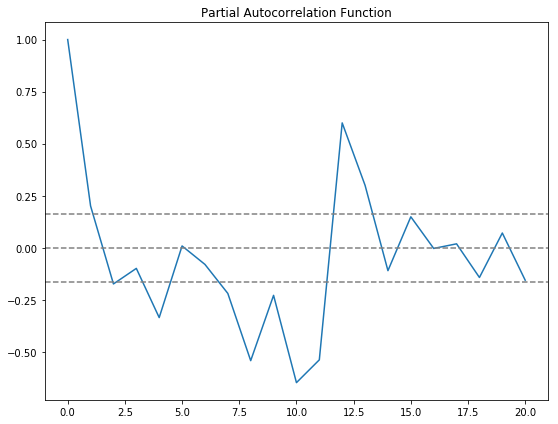

In [28]:
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 1.5023')

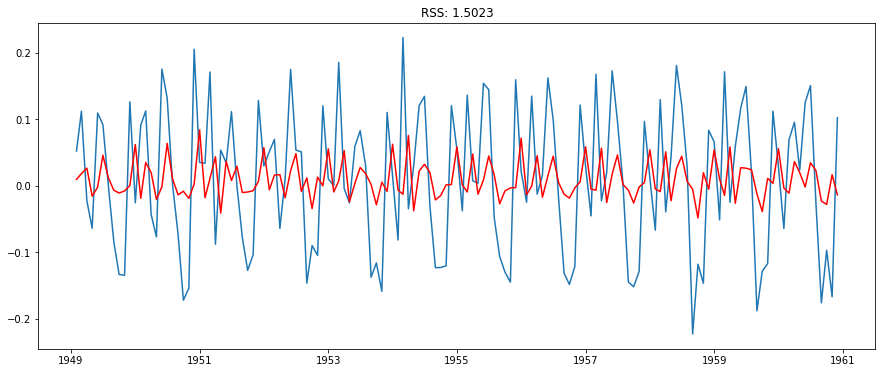

In [30]:
model = ARIMA(ts_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 1.4721')

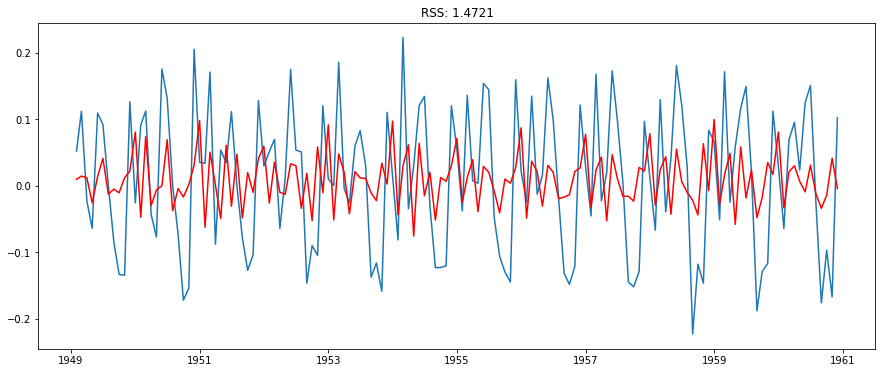

In [31]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 1.0292')

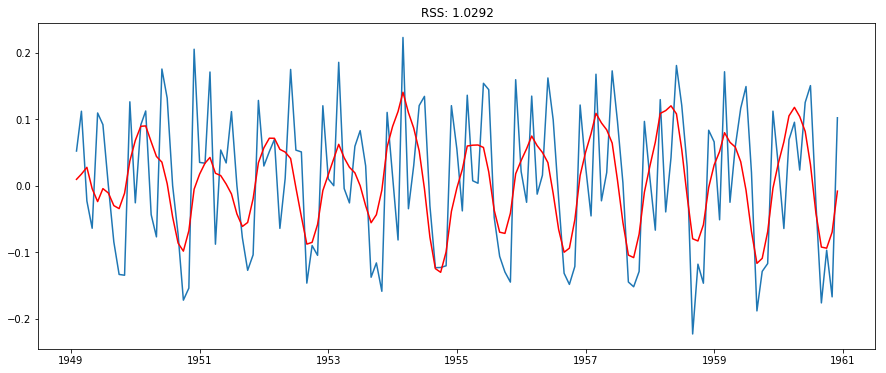

In [32]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum=  predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1044')

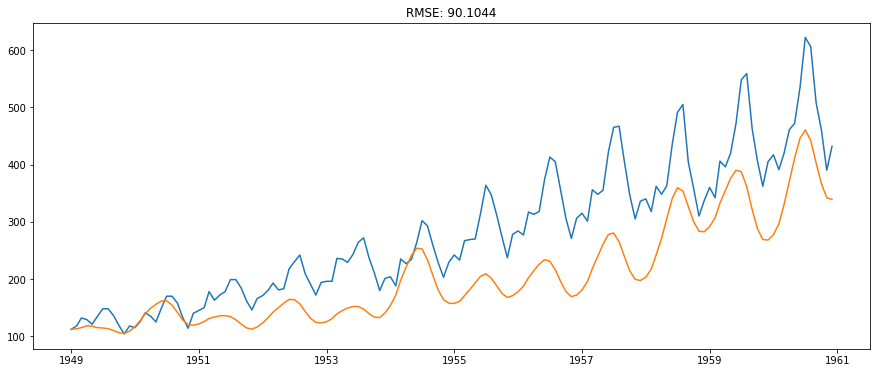

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))